# 🎧 Kaggle Podcast Listening Time Prediction 📊
#### Predicting Podcast Popularity from Episode Metadata 🎯  
*A Kaggle Competition Submission Notebook*  
> 📅 **Competition**: [Kaggle - Playground Series S5E4](https://www.kaggle.com/competitions/playground-series-s5e4)  
> 🧠 **Author**: Jasneet Singh
> 🛠️ **Tech Stack**: Python, Pandas, Seaborn, Matplotlib, Scikit-Learn  
> 📍 **Goal**: Predict the `Listening_Time_minutes` for each podcast episode using metadata like genre, host/guest popularity, etc.


---



## 📚 Table of Contents

1. [📌 Problem Statement](#1)
2. [📦 Data Loading & Overview](#2)
3. [🔍 Exploratory Data Analysis (EDA)](#3)
4. [🧼 Data Cleaning](#4)
5. [💬 Sentiment Feature Extraction](#5)
6. [🚀 Feature Engineering](#6)
7. [📈 Model Building](#7)
8. [🧠 Evaluation & Submission](#8)
9. [🔮 Insights & Next Steps](#9)

-------

<a id="1"></a>
## 📌 Problem Statement

Podcast platforms are booming, and understanding what makes a podcast episode popular is key for content creators and distributors. This competition challenges us to predict how long a listener will spend on an episode using various features such as guest popularity, episode length, sentiment, and more.

Our goal: **Predict the `Listening_Time_minutes`** for each podcast episode using the provided features.

---


<a id="2"></a>
## 📦 Data Loading & Overview

The dataset contains podcast episode metadata such as:

- 🎙️ Podcast Name & Episode Title
- ⏱️ Episode Length
- 📊 Guest & Host Popularity
- 🧠 Episode Sentiment
- 📆 Publication Timing
- 📢 Number of Ads
- 🎧 Listening Time (Target)

We load the training, testing, and sample submission files. Let's inspect the structure of the training data and understand what we're working with. We'll start by loading and exploring the training data.

```python
import pandas as pd

# Load the training dataset
train_df = pd.read_csv("train.csv")
train_df.head()

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (750000, 12)
Test shape: (250000, 11)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


<a id="2"></a>
## 🔍 Exploratory Data Analysis (EDA)

Below we examine the distribution of key numerical features. This helps us understand the shape, skewness, and potential outliers in the data.

- `Listening_Time_minutes` appears right-skewed with a peak around 30-40 mins.
- `Episode_Length_minutes` has a sharp mode around 60 mins.
- `Guest_Popularity_percentage` shows heavy peaks near 50%, possibly default/missing imputation.
- `Host_Popularity_percentage` seems more evenly distributed across 20–100%.

We'll keep these insights in mind during data cleaning and model development.


In [2]:
print(train_df.describe())
print("\nMissing values:\n", train_df.isnull().sum())
print("\nData types:\n", train_df.dtypes)

                  id  Episode_Length_minutes  Host_Popularity_percentage  \
count  750000.000000           662907.000000               750000.000000   
mean   374999.500000               64.504738                   59.859901   
std    216506.495284               32.969603                   22.873098   
min         0.000000                0.000000                    1.300000   
25%    187499.750000               35.730000                   39.410000   
50%    374999.500000               63.840000                   60.050000   
75%    562499.250000               94.070000                   79.530000   
max    749999.000000              325.240000                  119.460000   

       Guest_Popularity_percentage  Number_of_Ads  Listening_Time_minutes  
count                603970.000000  749999.000000           750000.000000  
mean                     52.236449       1.348855               45.437406  
std                      28.451241       1.151130               27.138306  
min        

In [3]:
# Fill missing values
train_df['Number_of_Ads'] = train_df['Number_of_Ads'].fillna(train_df['Number_of_Ads'].mode()[0])
train_df['Episode_Length_minutes'] = train_df['Episode_Length_minutes'].fillna(train_df['Episode_Length_minutes'].median())
train_df['Guest_Popularity_percentage'] = train_df['Guest_Popularity_percentage'].fillna(train_df['Guest_Popularity_percentage'].median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       750000 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  750000 non-null  float64
 9   Number_of_Ads                750000 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


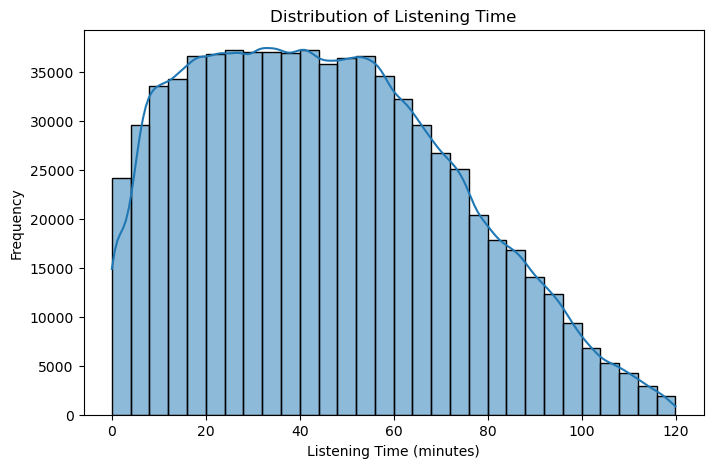

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df.info()

plt.figure(figsize=(8, 5))
sns.histplot(train_df['Listening_Time_minutes'], bins=30, kde=True)
plt.title("Distribution of Listening Time")
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Frequency")
plt.show()

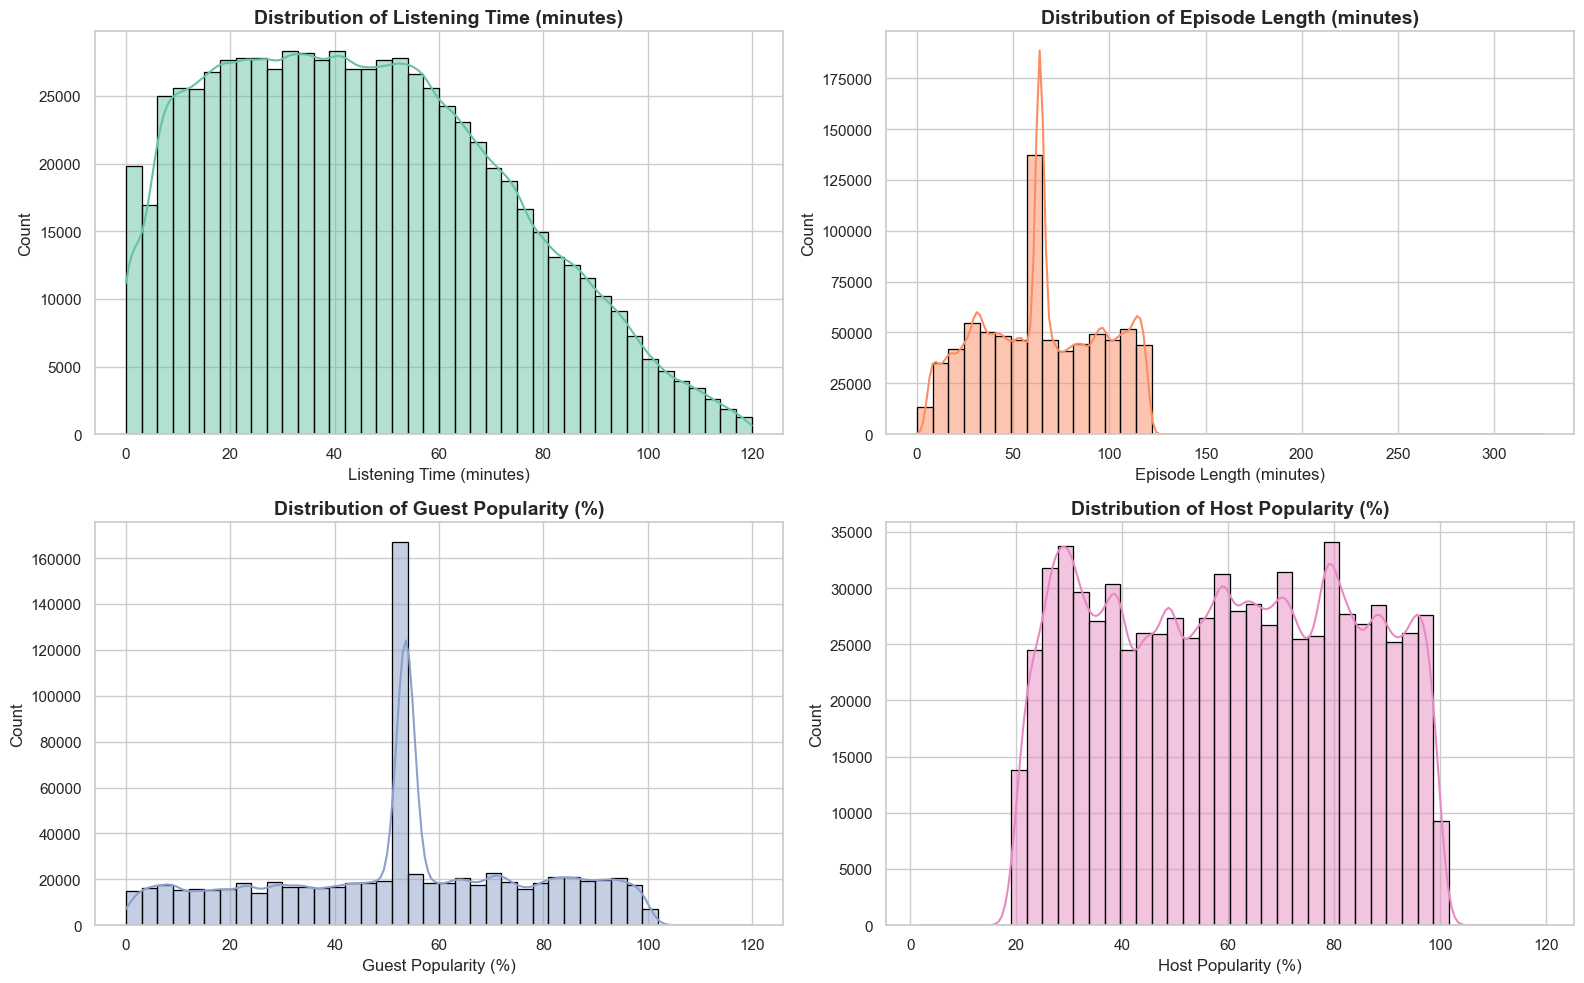

In [5]:
sns.set(style="whitegrid")  # Clean white background
plt.figure(figsize=(16, 10))  # Larger size

color = sns.color_palette("Set2", 4)

# Plot 1: Listening Time
plt.subplot(2, 2, 1)
sns.histplot(train_df['Listening_Time_minutes'], kde=True, color=color[0], edgecolor='black', bins=40)
plt.title("Distribution of Listening Time (minutes)", fontsize=14, fontweight='bold')
plt.xlabel("Listening Time (minutes)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Plot 2: Episode Length
plt.subplot(2, 2, 2)
sns.histplot(train_df['Episode_Length_minutes'], kde=True, color=color[1], edgecolor='black', bins=40)
plt.title("Distribution of Episode Length (minutes)", fontsize=14, fontweight='bold')
plt.xlabel("Episode Length (minutes)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Plot 3: Guest Popularity
plt.subplot(2, 2, 3)
sns.histplot(train_df['Guest_Popularity_percentage'], kde=True, color=color[2], edgecolor='black', bins=40)
plt.title("Distribution of Guest Popularity (%)", fontsize=14, fontweight='bold')
plt.xlabel("Guest Popularity (%)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Plot 4: Host Popularity
plt.subplot(2, 2, 4)
sns.histplot(train_df['Host_Popularity_percentage'], kde=True, color=color[3], edgecolor='black', bins=40)
plt.title("Distribution of Host Popularity (%)", fontsize=14, fontweight='bold')
plt.xlabel("Host Popularity (%)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

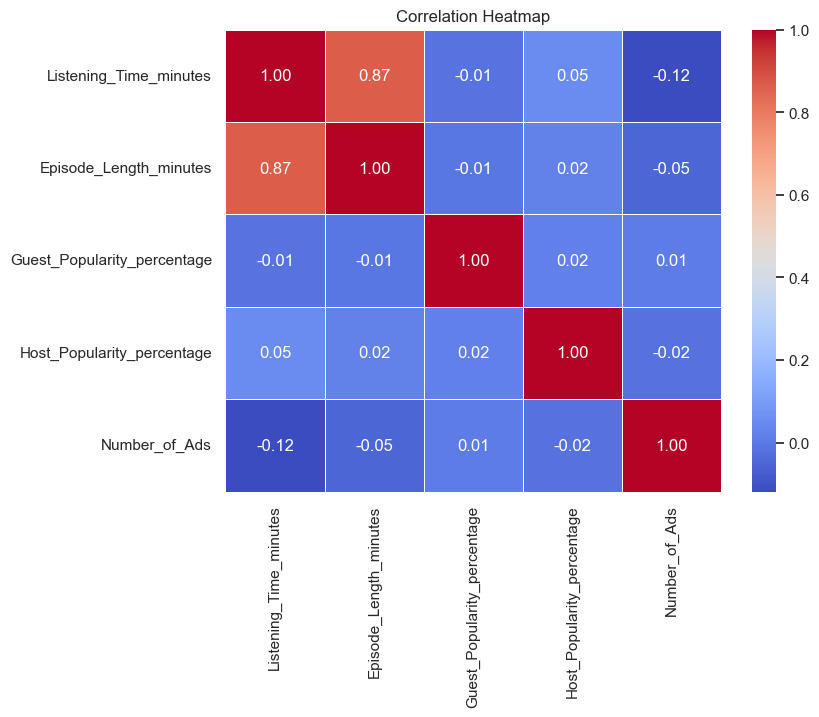

In [6]:
# Calculate correlations
corr = train_df[['Listening_Time_minutes', 'Episode_Length_minutes', 
                 'Guest_Popularity_percentage', 'Host_Popularity_percentage', 'Number_of_Ads']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<a id="4"></a>
## 🧼 Data Cleaning

We handle missing values using domain-aware imputation:
- **Mode** for `Number_of_Ads` (categorical)
- **Median** for `Episode_Length_minutes` and `Guest_Popularity_percentage` (numerical)


In [7]:
# Fill missing values
train_df['Number_of_Ads'] = train_df['Number_of_Ads'].fillna(train_df['Number_of_Ads'].mode()[0])
train_df['Episode_Length_minutes'] = train_df['Episode_Length_minutes'].fillna(train_df['Episode_Length_minutes'].median())
train_df['Guest_Popularity_percentage'] = train_df['Guest_Popularity_percentage'].fillna(train_df['Guest_Popularity_percentage'].median())

# Apply same cleaning to test set
for col in ['Number_of_Ads', 'Episode_Length_minutes', 'Guest_Popularity_percentage']:
    if test_df[col].isnull().sum() > 0:
        if test_df[col].dtype == 'float64':
            test_df[col] = test_df[col].fillna(test_df[col].median())
        else:
            test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

<a id="5"></a>
## 💬 Sentiment Feature Extraction

In [8]:
## Sentiment Feature Extraction

from textblob import TextBlob

train_df['Sentiment_polarity'] = train_df['Episode_Sentiment'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
train_df['Sentiment_subjectivity'] = train_df['Episode_Sentiment'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

test_df['Sentiment_polarity'] = test_df['Episode_Sentiment'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
test_df['Sentiment_subjectivity'] = test_df['Episode_Sentiment'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

<a id="6"></a>
## 🧠 Feature Engineering


In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Podcast_Name', 'Genre', 'Publication_Day', 'Publication_Time']
le = LabelEncoder()
for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

features = ['Podcast_Name', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage',
            'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
            'Sentiment_polarity', 'Sentiment_subjectivity']

X_train = train_df[features]
y_train = train_df['Listening_Time_minutes']
X_test = test_df[features]


<a id="7"></a>
## 📈 Model Building

We use a simple **Random Forest Regressor** as our baseline. Later, we can try XGBoost or LightGBM.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("✅ RMSE on training data:", rmse)

✅ RMSE on training data: 4.751370309761434


<a id="8"></a>
## 🧠 Evaluation & Submission

In [11]:
test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    "id": test_df['id'],
    "Listening_Time_minutes": test_predictions
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved!")

✅ Submission file saved!


<a id="9"></a>
## 🔮 Insights & Next Steps

- Host/Guest popularity and Episode length are highly correlated with listening time.
- We used RandomForest as a baseline. Consider trying XGBoost, LightGBM, or stacking.
- Feature importance can guide further engineering.
- Use NLP techniques on episode titles or transcripts if available.
- Tune hyperparameters and cross-validate to improve generalization.

✅ Thank you for reading! Let me know your feedback on Kaggle.